In [230]:
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt
from IPython.display import clear_output
import scipy.io as sio
import scipy.optimize as opt

## K-Mean Clustering

In [27]:
def random_centroids(X, K):
    """
    Returns K random dataset exaples.
    
    Parameters
    ----------
    X : array_like
        The dataset of size (m x n).
    K : int
        Number of clusters.
    Returns
    -------
    centroids : array_like
         Centroids of the clusters. This is a matrix of size (K x n).
    """
    m = X.shape[0]
    centroids = X[np.random.randint(m, size=K), :]
    return centroids

In [52]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example.
    
    Parameters
    ----------
    X : array_like
        The dataset of size (m, n) where each row is a single example. 
        That is, we have m examples each of n dimensions.
        
    centroids : array_like
        The k-means centroids of size (K, n). K is the number
        of clusters, and n is the the data dimension.
    
    Returns
    -------
    idx : array_like
        A vector of size (m, ) which holds the centroids assignment for each
        example (row) in the dataset X.
    """
    idx = np.zeros(X.shape[0], dtype=int)
    
    for i in range(X.shape[0]):
        J = np.square(X[i] - centroids).sum(axis=1)
        idx[i] = np.argmin(J) 
    return idx

In [83]:
def compute_means(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.
    
    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it 
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    
    idx : array_like 
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1])
        for each example.
    
    K : int
        Number of clusters
    
    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data 
        points assigned to it.
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for k in range(K):
        centroids[k] = np.mean(X[idx == k], axis=0)
    return centroids
    

In [165]:
def KMean(X, K, iterations=10):
    """
    The K-means algorithm is a method to automatically cluster similar data examples together. 
    Concretely, you are given a training set {x(1), ..., x(m)} (where x (i) ∈ R(n)), 
    and want to group the data into a few cohesive “clusters”.
    The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, 
    and then refines this guess by repeatedly assigning examples to their closest centroids and 
    then recomputing the centroids based on the assignments.
    
    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it 
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    K : int
        Number of clusters.
    iterations : int
        Number of iterations.
    
    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data 
        points assigned to it.
    idx : array_like
        A vector of size (m,) for cluster assignment for each example in the dataset. Each entry
        in idx is within the range [0 ... K-1].
    """
    
    # init random centroids
    centroids = random_centroids(X, K)
    for _ in range(iterations):
         # Cluster assignment step: 
         # Assign each data point to the closest centroid. idx(i) corresponds to cˆ(i), the index of the centroid assigned to example i
        idx = find_closest_centroids(X, centroids)
        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_means(X, idx, K)
    return centroids, idx

In [226]:
#Prepare Data
raw_data = sio.loadmat('static/datasets/kmean/ex7data2.mat')
X = raw_data['X'] # (300, 2)

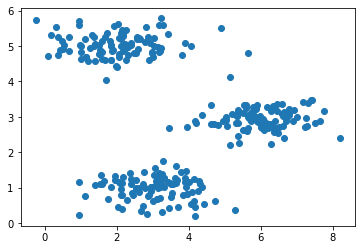

In [227]:
plt.plot(X[:, 0],X[:, 1], 'o')

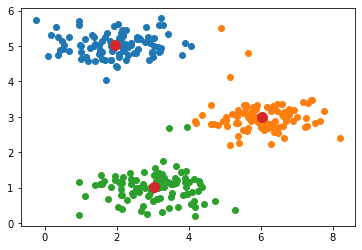

In [229]:
K = 3
iterations = 10
centroids, idx  = KMean(X, K, iterations)
for k in range(K):
    plt.plot(X[idx == k, 0],X[idx == k, 1], 'o')
plt.plot(centroids[:, 0], centroids[:, 1], 'o', markersize=10)

### K-Mean on Pixels

In [181]:
img = mtp.image.imread('static/datasets/kmean/bird_small.png')

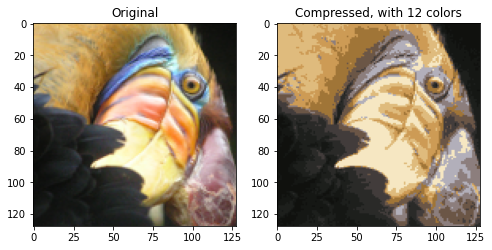

In [220]:
K = 12
max_iters = 10

X = img.reshape(-1,3)
centroids, idx  = KMean(X, K, max_iters)

X_recovered = centroids[idx, :].reshape(img.shape)

# Display the original image, rescale back by 255
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].grid(False)

# Display compressed image, rescale back by 255
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)